**Muhammad Raditya Putra**
*2110511004*

---

# SCRAPPING DATASET

In [ ]:
# Mengimpor modul yang diperlukan
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
import time
import pandas as pd
import sys

In [ ]:
# Mengatur encoding konsol menjadi UTF-8
sys.stdout.reconfigure(encoding='utf-8')

In [ ]:
# URL dari halaman ulasan Tokopedia
url = "https://www.tokopedia.com/logitech/review"

In [ ]:
# Mengatur Chrome WebDriver
options = webdriver.ChromeOptions()
options.add_argument("--start-maximized")
driver = webdriver.Chrome(options=options)
driver.get(url)

In [ ]:
# List untuk menyimpan data yang di-scrape
data = []

In [ ]:
# Melakukan iterasi melalui halaman (diasumsikan ada 200 halaman)
for i in range(0, 200):
    # Menunggu hingga kontainer artikel hadir
    WebDriverWait(driver, 200).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'article.css-ccpe8t')))

    # Parsing konten HTML menggunakan BeautifulSoup
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Menemukan semua kontainer ulasan
    containers = soup.findAll('article', attrs={'class': 'css-ccpe8t'})

    # Iterasi melalui setiap kontainer ulasan
    for container in containers:
        # Mengekstrak elemen ulasan dan rating
        review_element = container.find('span', attrs={'data-testid': 'lblItemUlasan'})
        rating_element = container.find('div', attrs={'data-testid': 'icnStarRating'})

        # Memeriksa apakah review_element dan rating_element tidak None
        if review_element and rating_element:
            # Mengekstrak teks ulasan dan rating
            review = review_element.text
            rating = rating_element.get('aria-label').replace('bintang ', '')
            data.append((review, rating))
        else:
            # Menangani kasus di mana review_element atau rating_element adalah None
            print("Elemen Ulasan atau Rating tidak ditemukan untuk kontainer ini. Melewati.")

    # Jeda selama 2 detik sebelum beralih ke halaman berikutnya
    time.sleep(2)

    # Mengklik tombol "Halaman berikutnya"
    driver.find_element(By.CSS_SELECTOR, "button[aria-label^='Laman berikutnya']").click()

    # Jeda selama 3 detik sebelum melanjutkan ke iterasi berikutnya
    time.sleep(3)

In [ ]:
# Membuat DataFrame dari data yang terkumpul
df = pd.DataFrame(data, columns=["Ulasan", "Rating"])

In [ ]:
# Menyimpan DataFrame ke file CSV
df.to_csv("ulasantokped2.csv", index=False)

In [ ]:
# Menutup Chrome WebDriver
driver.close()

# IMPORT DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

data = pd.read_csv("ulasantokped2.csv")

data.head()


,Ulasan,Rating
0,Kualitas baik pengiriman cepat terima kasih se...,5
1,sesuai pesanan,5
2,"Barang original, plug & play",5
3,cepet sampe semoga awet,5
4,"Bagus banget, sesuai ekspektasi.",5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ulasan  1964 non-null   object
 1   Rating  1964 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.8+ KB


In [ ]:
data.describe()

,Rating
count,1964.000000
mean,4.964868
std,0.314836
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


# PREPROCESSING

**Labeling**

In [ ]:
label = []
for index, row in data.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

data["label"] = label

data

,Ulasan,Rating,label
0,Kualitas baik pengiriman cepat terima kasih se...,5,1
1,sesuai pesanan,5,1
2,"Barang original, plug & play",5,1
3,cepet sampe semoga awet,5,1
4,"Bagus banget, sesuai ekspektasi.",5,1
...,...,...,...
1959,udah dipakai dan berfungsi dg baik,5,1
1960,Thanks ya seller mouse opticnya berfungsi deng...,5,1
1961,berfungsi semuanya keyboard & mousenya mksh su...,5,1
1962,Barang sudah sampai dan cepat banget untuk tuj...,5,1


In [ ]:
data["label"].value_counts()

1    1950
0      14
Name: label, dtype: int64

**MENGHITUNG KATA DENGAN TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
Ulasan = data['Ulasan']

In [ ]:
Ulasan.isnull().sum()

0

In [ ]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [ ]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

1098


In [ ]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata

{'kualitas': 464,
 'baik': 68,
 'pengiriman': 738,
 'cepat': 169,
 'terima': 991,
 'kasih': 410,
 'seller': 884,
 'dan': 195,
 'tokped': 1024,
 'sesuai': 904,
 'pesanan': 760,
 'barang': 77,
 'original': 682,
 'plug': 768,
 'play': 767,
 'cepet': 171,
 'sampe': 846,
 'semoga': 887,
 'awet': 58,
 'bagus': 64,
 'banget': 70,
 'ekspektasi': 279,
 'produk': 783,
 'nyaman': 663,
 'di': 223,
 'pakai': 698,
 'cuman': 187,
 'pindah2': 764,
 'devicenya': 219,
 'tidak': 1017,
 'selancar': 882,
 'yang': 1094,
 'saya': 853,
 'harapkan': 341,
 'antara': 41,
 'tab': 965,
 'desktop': 216,
 'tiap': 1015,
 'mau': 559,
 'switch': 962,
 'ke': 412,
 'mesti': 596,
 'pairing': 696,
 'ulang': 1051,
 'sampai': 844,
 'pas': 710,
 'ukuran': 1049,
 'lekuknya': 491,
 'enak': 284,
 'dipakai': 250,
 'akurat': 30,
 'sudah': 952,
 'beberapa': 86,
 'bulan': 149,
 'gak': 311,
 'ada': 17,
 'kendala': 423,
 'minimalis': 605,
 'wireless': 1080,
 'murah': 627,
 'ringan': 827,
 'top': 1029,
 'quality': 791,
 'product': 782,

In [ ]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

In [ ]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

sesuai pesanan


In [ ]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 760)	1
  (0, 904)	1


In [ ]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[7.48463524 7.48463524 7.48463524 ... 2.70271454 7.48463524 6.97380961]
  (0, 904)	0.4744341384801178
  (0, 760)	0.8802910020241196


# NLP (NATURAL LANGUAGE PROCESSING)

In [ ]:
data_label = data[["Ulasan", "label"]]

In [ ]:
data_label["Ulasan"] = data_label["Ulasan"].fillna("tidak ada komentar")

<ipython-input-20-dbf2a4f1c592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label["Ulasan"] = data_label["Ulasan"].fillna("tidak ada komentar")


In [ ]:
data_label.to_excel("data_label.xlsx")

# Sentimen Data Ulasan

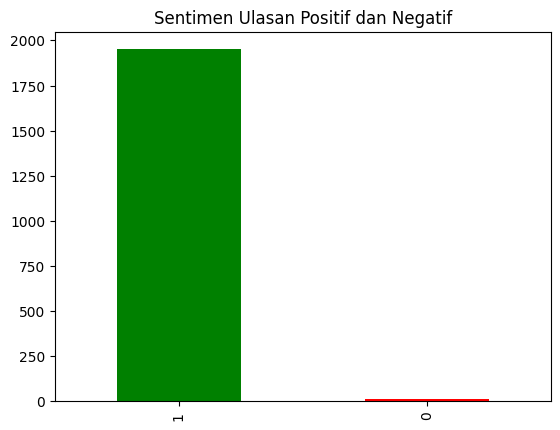

In [ ]:
from wordcloud import WordCloud
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Sentimen Ulasan Positif dan Negatif')
plt.show()

# Ulasan Positif


In [ ]:
train_s1 = data_label[data_label["label"] == 1]

In [ ]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("tidak ada komentar")

<ipython-input-24-aef0ff8acd89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["Ulasan"] = train_s1["Ulasan"].fillna("tidak ada komentar")


In [ ]:
train_s1

,Ulasan,label
0,Kualitas baik pengiriman cepat terima kasih se...,1
1,sesuai pesanan,1
2,"Barang original, plug & play",1
3,cepet sampe semoga awet,1
4,"Bagus banget, sesuai ekspektasi.",1
...,...,...
1959,udah dipakai dan berfungsi dg baik,1
1960,Thanks ya seller mouse opticnya berfungsi deng...,1
1961,berfungsi semuanya keyboard & mousenya mksh su...,1
1962,Barang sudah sampai dan cepat banget untuk tuj...,1


Visualisasi Ulasan Positif

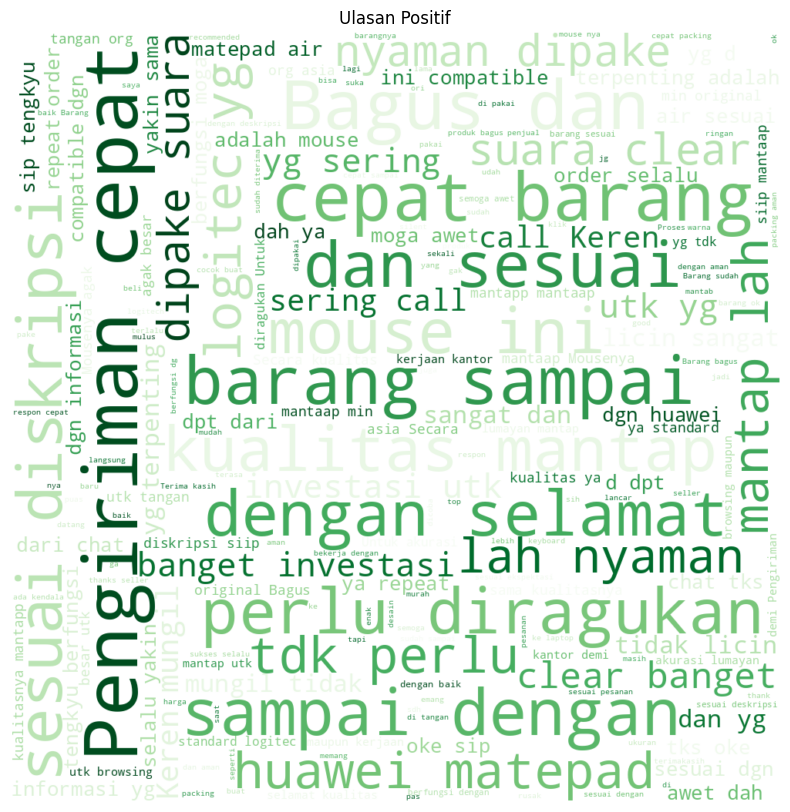

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Greens', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

# Ulasan Negatif


In [ ]:
train_s0 = data_label[data_label["label"] == 0]

In [ ]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")

<ipython-input-28-8dc3798ca55b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")


In [ ]:
train_s0

,Ulasan,label
91,"Barang tidak murah, tapi pelayanan payah.\n\nB...",0
99,"sekip dah beli logitech lagi, kurang awet",0
140,"overal mousenya bagus, nyaman dipakai untuk ke...",0
229,Jadi beli barang disini..untuk fisik ga ada ma...,0
236,keyboard tidak berfungsi.,0
305,"Pengiriman Terlambat, tidak ada pilihan instan...",0
378,"Seller salah kirim, proses tuker barang ribet,...",0
1651,"Barang tidak murah, tapi pelayanan payah.\n\nB...",0
1659,"sekip dah beli logitech lagi, kurang awet",0
1701,"overal mousenya bagus, nyaman dipakai untuk ke...",0


Visualisasi Data Ulasan Negatif

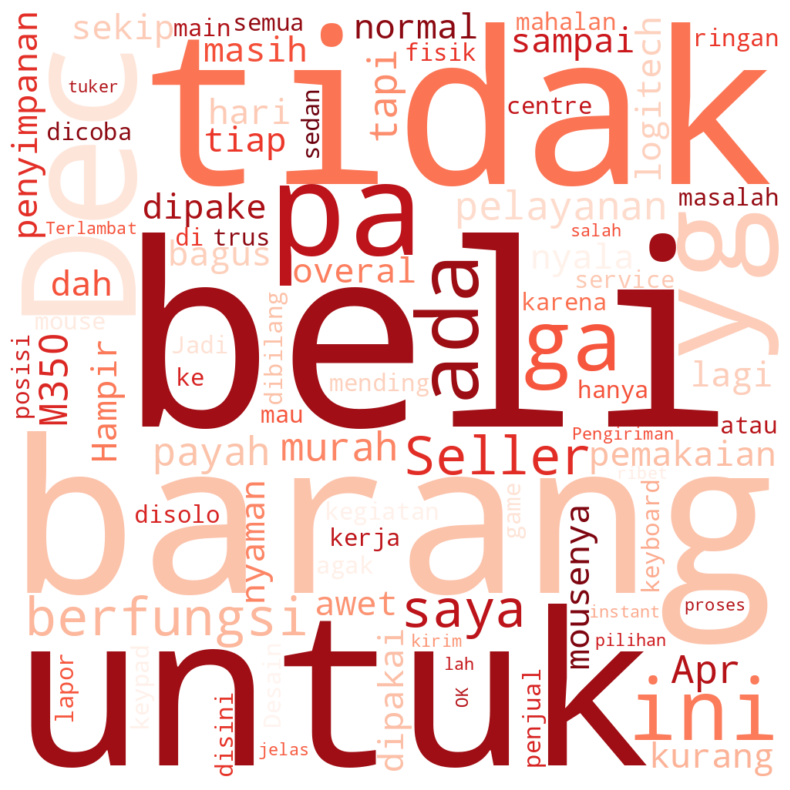

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Training Testing

In [ ]:
data_label['Ulasan'] = data_label['Ulasan'].fillna("tidak ada komentar")

<ipython-input-31-117acfc553af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_label['Ulasan'] = data_label['Ulasan'].fillna("tidak ada komentar")


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan'], data_label['label'],
                                                    test_size=0.1, stratify=data_label['label'], random_state=11)

# TF-IDF (TERM FREQUENCY-INVERSE DOCUMENT)

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1767, 1085)
(197, 1085)


In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

# Model Machine Learning

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=9999)

# Tuning hyperparameter menggunakan gridsearch
params_NB = {'var_smoothing': np.logspace(-3, -9, num=50)}  # Mengurangi jumlah nilai yang diuji

gscv_nb = GridSearchCV(estimator=nb,
                       param_grid=params_NB,
                       cv=cv_method,   # Gunakan teknik validasi silang apa pun
                       verbose=1,
                       scoring='accuracy')

# Fitting ke Model
gscv_nb.fit(X_train, y_train)

# Mendapatkan hyperparameters terbaik
best_params = gscv_nb.best_params_
print("Hyperparameters Terbaik:", best_params)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
Hyperparameters Terbaik: {'var_smoothing': 0.0005689866029018299}


In [ ]:
nb = GaussianNB(var_smoothing=best_params['var_smoothing'])

In [ ]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0005689866029018299)

In [ ]:
y_pred_nb = nb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.svm import SVC  # Menggunakan SVM sebagai model

# Inisialisasi model
model = SVC()

# Latih model dengan data latih
model.fit(X_train, y_train)

# Lakukan prediksi pada data latih
y_pred_train = model.predict(X_train)

# Hitung matriks kebingungan
cm = confusion_matrix(y_train, y_pred_train)

# Cetak matriks kebingungan
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  12    1]
 [   0 1754]]


# Classification Report

In [ ]:
print('=========================================================================')
print('------------------------ confusion matrix  ------------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('=========================================================================')
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))
print('=========================================================================')

------------------------ confusion matrix  ------------------------------
[[  1   0]
 [  5 191]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      0.97      0.99       196

    accuracy                           0.97       197
   macro avg       0.58      0.99      0.64       197
weighted avg       1.00      0.97      0.98       197

